In [9]:
import numpy as np
import math
from math import sqrt as sqrt
from math import pi as pi
from math import exp as exp
from numpy import log as log
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
D=1
R=0.005
gamma=0.57721
td=(2*R)**2/4/D
print('td',td)

def kck(ka,t,C):
    ln=log(C*t)
    return 4*pi*D*(1/ln-gamma/ln**2-1.311/ln**3+0.25/ln**4)

def er(a,b):
    return (a-b)*100/a

#kfac=ka/4piD
print('l=R','P=ka/2/sqrt(3)/D')
for kfac in [0.1,1,10]:
    l=R
    ka=kfac*4*pi*D
    P=ka/2/sqrt(3)/D
    A=2*pi/sqrt(3)
    Cl=48*D*exp(A*(1./P-1))/l/l

    kk=exp(4*pi*D/ka-2*gamma)
    C=4*D*kk/R/R
    tt=1000*td
    print(kfac)
    print(er(kck(ka,tt,C),kck(ka,tt,Cl)))
    #print(kck(ka,tt,C),kck(ka,tt,Cl),er(kck(ka,tt,C),kck(ka,tt,Cl)))
    #plt.semilogx(tt,kck(ka,tt,C),'-')
    #plt.semilogx(tt,kck(ka,tt,Cl),'--')

td 2.5e-05
l=R P=ka/2/sqrt(3)/D
0.1
0.06536337006142344
1
0.12665230233542651
10
0.1387110079768386


In [3]:
print('l=Rf','P=ka/2/sqrt(3)/D')
for kfac in [0.1,1,10]:
    f=1.0209
    l=R*f
    ka=kfac*4*pi*D
    P=ka/2/sqrt(3)/D
    A=2*pi/sqrt(3)
    Cl=48*D*exp(A*(1./P-1))/l/l
    print(2*sqrt(3)*D/ka)
    kk=exp(4*pi*D/ka-2*gamma)
    C=4*D*kk/R/R
    tt=1000*td
    print(kfac)
    print(er(kck(ka,tt,C),kck(ka,tt,Cl)))
    #print(kck(ka,tt,C),kck(ka,tt,Cl),er(kck(ka,tt,C),kck(ka,tt,Cl)))

l=Rf P=ka/2/sqrt(3)/D
2.75664447710896
0.1
0.1655790837613257
0.27566444771089604
1
0.321474112536437
0.0275664447710896
10
0.35219448620008315


In [4]:
for kfac in [0.1,1,10]:
    l=R*f
    ka=kfac*4*pi*D
    P=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    A=2*pi/sqrt(3)
    Cl=48*D*exp(A*(1./P-1))/l/l

    kk=exp(4*pi*D/ka-2*gamma)
    C=4*D*kk/R/R
    tt=1000*td
    print(kfac)
    print(er(kck(ka,tt,C),kck(ka,tt,Cl)))
    #print(kck(ka,tt,C),kck(ka,tt,Cl),er(kck(ka,tt,C),kck(ka,tt,Cl)))

0.1
0.3953288537857491
1
0.36606125737417533
10
0.35707854569070835


Pori=28.98626,Pnew=23.35961
kfac 100
diff at kt(1000td) from asymptotic kCK with ori=0.15296, new=0.00015


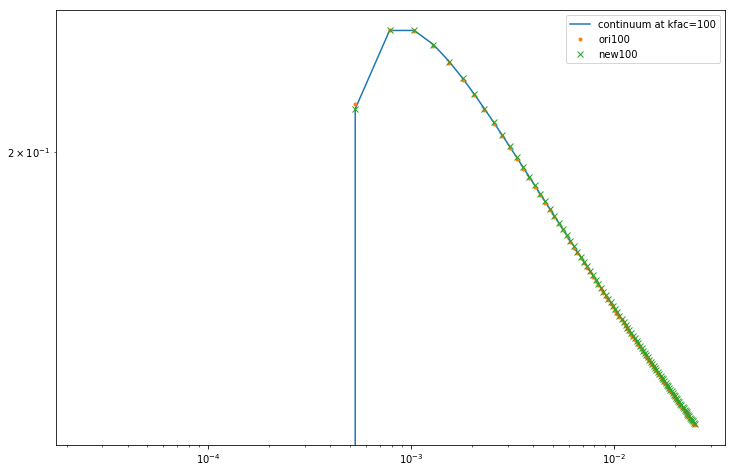

In [4]:
#discrepancy between kck and ori/new is consistent for large t, 
#single point is enough show discrepancy

fig,ax=plt.subplots(1,1,figsize=(12,8))
R=0.01
D=1
g=0.57721566
td=(R)**2/4/D
A=2*pi/sqrt(3)

def KK(tt,C1,C2):
    f=C1*tt
    A=np.log(f)+C2
    return 4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

for kfac in [100]:#ka/D
    f=1.0209
    l=R*f
    ka=kfac*D
    K=ka/2/math.pi/D
    Pori=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    Pnew= 1./(1+(sqrt(3)/2/pi)*(np.log(f*f/12)+(2/K)-2*g))        
    print('Pori={:.5f},Pnew={:.5f}'.format(Pori,Pnew))
    assert Pnew>0
    tt=1000*td
    kori = KK(tt,48*D/R/R,A*(1./Pori-1))
    knew = KK(tt,48*D/l/l,A*(1./Pnew-1))
    kCK = KK(tt,4*D/R/R,4*pi*D/ka-2*gamma)
    print('kfac',kfac)
    print('diff at kt(1000td) from asymptotic kCK with ori={:.5f}, new={:.5f}'.format(er(kCK,kori),er(kCK,knew)))
    tt=np.linspace(td,1000*td,100)
    ax.semilogx(tt,KK(tt,4*D/R/R,4*pi*D/ka-2*gamma)/(4*pi*D),'-',label='continuum at kfac='+str(kfac))
    ax.loglog(tt,KK(tt,48*D/R/R,A*(1./Pori-1))/(4*pi*D),'.',label='ori'+str(kfac))
    ax.loglog(tt,KK(tt,48*D/l/l,A*(1./Pnew-1))/(4*pi*D),'x',label='new'+str(kfac))
#difori = abs(kck(ka,tt,C)-kck(ka,tt,Clori))*100/kck(ka,tt,C)
#difnew = abs(kck(ka,tt,C)-kck(ka,tt,Clnew))*100/kck(ka,tt,C)
#ax.plot(tt,difori,'.',label='ori')
#ax.semilogy(tt,difnew,'x','-',label='new')
#plt.ylim(0,0.5)
plt.legend()


In [16]:
(g**2-np.pi**2/6)

-1.3117561486989908

td 2.5e-05


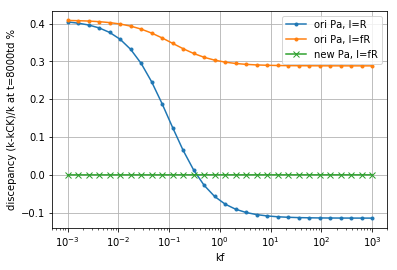

In [18]:
import mpmath as mp
import numpy as np
import math
from math import sqrt,pi
from scipy import special
mydehoog = mp.calculus.inverselaplace.deHoog(mp)
D=1
R=0.005
C=R/D**0.5
gamma=0.57721
td=(2*R)**2/4/D
g=0.57721566
print('td',td)

def KK(tt,C1,C2):
    f=C1*tt
    AA=np.log(f)+C2
    return 4*np.pi*D*(1/AA-g/AA**2+(g**2-np.pi**2/6)/AA**3+0.25/AA**4)

def er(a,b):
    return (a-b)*100/a

def invlt(ka,t):    #inverse laplace transform of k(z)
    mp.dps = 15;
    kz = lambda s: 2*np.pi*D*C*special.kv(1,C*(complex(s)**0.5))/complex(s)**0.5/special.kv(0,C*(complex(s)**0.5)) 
    fp= lambda s: ka/(complex(s)+ka/kz(s))
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def disc(kfac):
    A=2*pi/sqrt(3)
    f=1.0208582
    l=R*f
    #ka=kfac*D
    ka=kfac*D*4*pi
    #K=ka/2/math.pi/D
    factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
    #Pori=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    #Pnew= 1./(1+(sqrt(3)/2/pi)*(np.log(f*f/12)+(2/K)-2*g))        
    Pori=ka*factor/D
    Pnew=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)    
    #print('Pori={:.5f},Pnew={:.5f}'.format(Pori,Pnew))
    assert Pnew>0
    tt=8000*td
    kori = KK(tt,48*D/R/R,A*(1./Pori-1))
    kori2 = KK(tt,48*D/l/l,A*(1./Pori-1))
    knew = KK(tt,48*D/l/l,A*(1./Pnew-1))
    kCK = KK(tt,4*D/R/R,4*pi*D/ka-2*gamma)
    #kCK = invlt(ka,tt)
    return er(kori,kCK),er(knew,kCK),er(kori2,kCK)

kf = np.logspace(-3,3,30)
out = np.array([disc(k) for k in kf]).T
plt.plot(kf,out[0],'.-',label='ori Pa, l=R')
plt.plot(kf,out[2],'.-',label='ori Pa, l=fR')
plt.semilogx(kf,out[1],'-x',label='new Pa, l=fR')
plt.xlabel('kf')
plt.ylabel('discepancy (k-kCK)/k at t=8000td %')
plt.legend()
plt.grid()

No handles with labels found to put in legend.


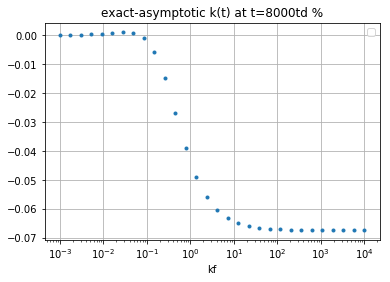

In [19]:
import mpmath as mp
from scipy import special
mydehoog = mp.calculus.inverselaplace.deHoog(mp)
C=R/D**0.5

def invlt(ka,t):    #inverse laplace transform of k(z)
    mp.dps = 15;
    kz = lambda s: 2*np.pi*D*C*special.kv(1,C*(complex(s)**0.5))/complex(s)**0.5/special.kv(0,C*(complex(s)**0.5)) 
    fp= lambda s: ka/(complex(s)+ka/kz(s))
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def disc(kfac):
    f=1.0209
    l=R*f
    ka=kfac*D*4*pi
    tt=8000*td
    kCK = KK(tt,4*D/R/R,4*pi*D/ka-2*gamma)
    kCKe = invlt(ka,tt)
    return er(kCK,kCKe)

kf = np.logspace(-3,4,30)
out = np.array([disc(k) for k in kf]).T
plt.semilogx(kf,out,'.')
plt.xlabel('kf')
plt.title('exact-asymptotic k(t) at t=8000td %')
plt.legend()
plt.grid()

In [7]:
#square lattice
D=1
R=0.005
gamma=0.57721
td=(2*R)**2/4/D
print('td',td)

def kck(ka,t,C):
    ln=log(C*t)
    return 4*pi*D*(1/ln-gamma/ln**2-1.311/ln**3)

def er(a,b):
    return (a-b)*100/a

#kfac=ka/4piD
for kfac in [0.1,1,10]:
    l=R
    ka=kfac*4*pi*D
    P=ka/6/D
    f=1    
    A=1/pi
    B=8.
    #P=1./(1+(log(1/B)+(4*pi*D/ka)-2*gamma)/A)
    Cl=8*4*D*exp(A*(1./P-1))/l/l

    kk=exp(4*pi*D/ka-2*gamma)
    C=4*D*kk/R/R
    tt=1000*td
    print(kfac)
    print(er(kck(ka,tt,C),kck(ka,tt,Cl)))
    #print(kck(ka,tt,C),kck(ka,tt,Cl),er(kck(ka,tt,C),kck(ka,tt,Cl)))
    #plt.semilogx(tt,kck(ka,tt,C),'-')
    #plt.semilogx(tt,kck(ka,tt,Cl),'--')

td 2.5e-05
0.1
-44.76283168146519
1
18.364189930031966
10
25.33947324572454


In [81]:
np.exp(1000)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf